<a href="https://colab.research.google.com/github/Sedvin1903/oibsip_dstask3/blob/main/Oasis_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tabulate import tabulate


In [4]:
# Load the car price dataset
data = pd.read_csv('cars.csv')

In [ ]:
'''   Exploratory Data Analysis (EDA)  '''

In [6]:
# Display the first few rows of the dataset

print("First few rows of the dataset:\n")
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print("\n")


First few rows of the dataset:

╒════╤══════════╤═════════════╤══════════════════════════╤════════════╤══════════════╤══════════════╤═════════════╤══════════════╤══════════════════╤═════════════╤═════════════╤════════════╤═════════════╤══════════════╤══════════════╤══════════════════╤══════════════╤══════════════╤═════════════╤══════════╤════════════════════╤══════════════╤═══════════╤═══════════╤══════════════╤═════════╕
│    │   car_ID │   symboling │ CarName                  │ fueltype   │ aspiration   │ doornumber   │ carbody     │ drivewheel   │ enginelocation   │   wheelbase │   carlength │   carwidth │   carheight │   curbweight │ enginetype   │ cylindernumber   │   enginesize │ fuelsystem   │   boreratio │   stroke │   compressionratio │   horsepower │   peakrpm │   citympg │   highwaympg │   price │
╞════╪══════════╪═════════════╪══════════════════════════╪════════════╪══════════════╪══════════════╪═════════════╪══════════════╪══════════════════╪═════════════╪═════════════╪═══

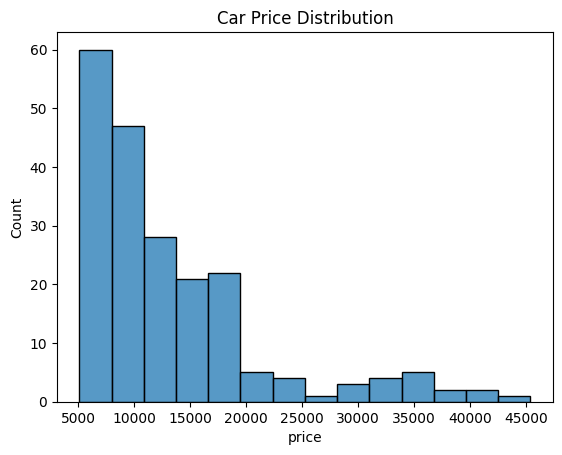

In [7]:
# Visualize the distribution of the target variable (price)

sns.histplot(data['price'])
plt.title('Car Price Distribution')
plt.show()


<ipython-input-8-3be4a1361c04>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


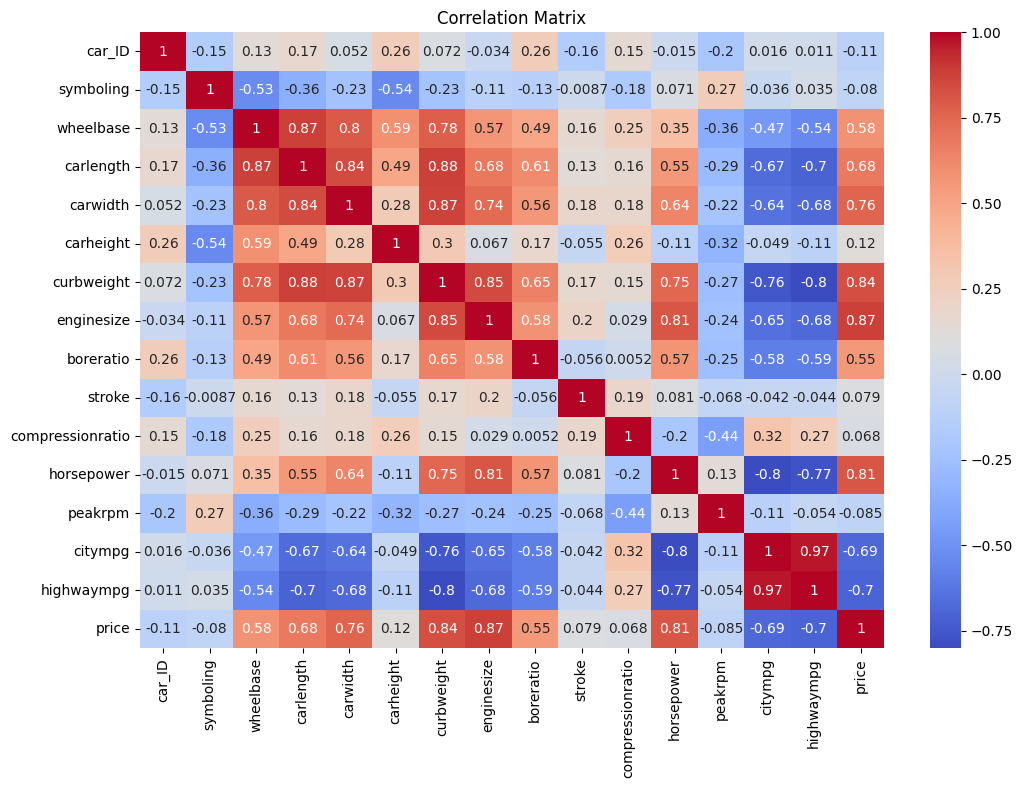

In [8]:
# Visualize the correlation between numerical features

corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
'''  Data Preprocessing  '''

In [9]:
# Drop irrelevant columns (car_ID, CarName)
data = data.drop(['car_ID', 'CarName'], axis=1)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Split the dataset into input features (X) and target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
'''   Model Training and Evaluation   '''

In [15]:

# Model Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
}

results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)          # ''' Mean Square Error '''
    rmse = np.sqrt(mse)                               #''' Root Mean Square Error '''
    r2 = r2_score(y_test, y_pred)                     # ''' R-squared (R^2) score, [ Coefficient of determination Error ] '''

    # Store the results
    results.append([model_name, rmse, r2])

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Reshape the input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions using the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# LSTM model evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

# Store the LSTM model results
results.append(['LSTM', rmse_lstm, r2_lstm])

# Display model evaluation results
headers = ['Model', 'RMSE', 'R^2 Score']
print(tabulate(results, headers, tablefmt='fancy_grid'))


2/2 [==============================] - 1s 14ms/step
╒═══════════════════╤══════════╤═════════════╕
│ Model             │     RMSE │   R^2 Score │
╞═══════════════════╪══════════╪═════════════╡
│ Linear Regression │  2912.39 │    0.892557 │
├───────────────────┼──────────┼─────────────┤
│ Decision Tree     │  2735.75 │    0.905194 │
├───────────────────┼──────────┼─────────────┤
│ Random Forest     │  1778.79 │    0.95992  │
├───────────────────┼──────────┼─────────────┤
│ XGBoost           │  2239.71 │    0.936458 │
├───────────────────┼──────────┼─────────────┤
│ LSTM              │ 16078.1  │   -2.27456  │
╘═══════════════════╧══════════╧═════════════╛


In [ ]:
'''
In general, for model selection, it is recommended to consider both RMSE and R2 score together.
A good model should have both a low RMSE and a high R2 score.
'''